In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



In [311]:
data = pd.read_csv("/content/water_potability.csv")

In [282]:
data.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [283]:
data.tail(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [284]:
data.shape

(3276, 10)

In [285]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [286]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<ipython-input-287-f9035bf28e12>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.ph)


<Axes: xlabel='ph', ylabel='Density'>

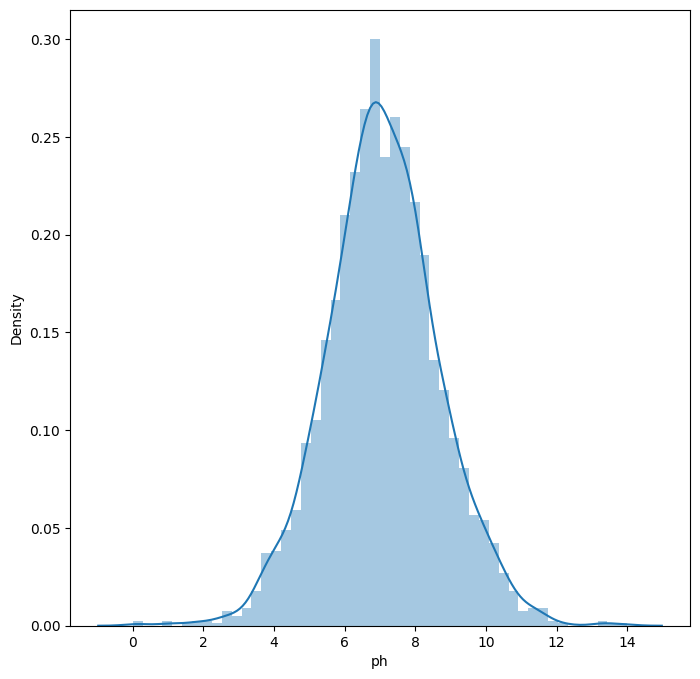

In [287]:
fig,ax = plt.subplots(figsize=(8,8))
sns.distplot(data.ph)

<ipython-input-288-55a1d12497bb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Sulfate)


<Axes: xlabel='Sulfate', ylabel='Density'>

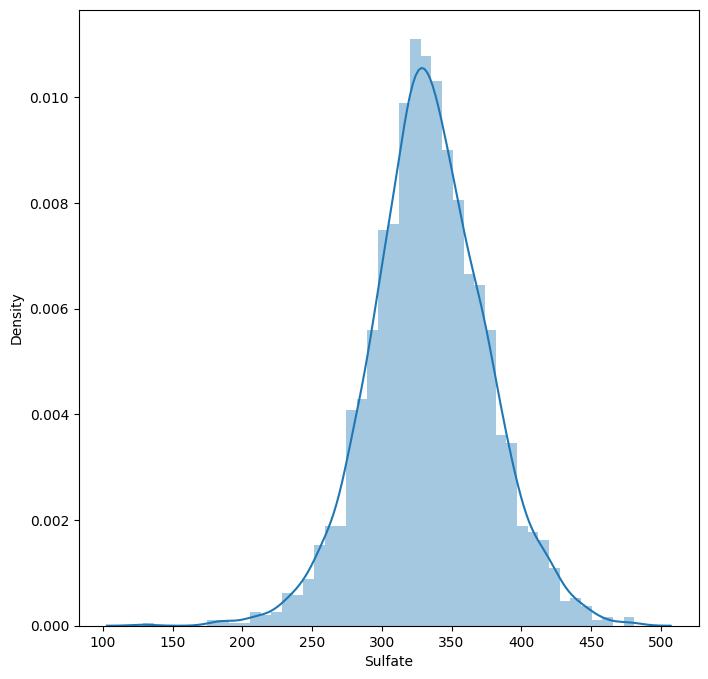

In [288]:
fig,ax = plt.subplots(figsize=(8,8))
sns.distplot(data.Sulfate)


<ipython-input-289-4837d29e35db>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Trihalomethanes)


<Axes: xlabel='Trihalomethanes', ylabel='Density'>

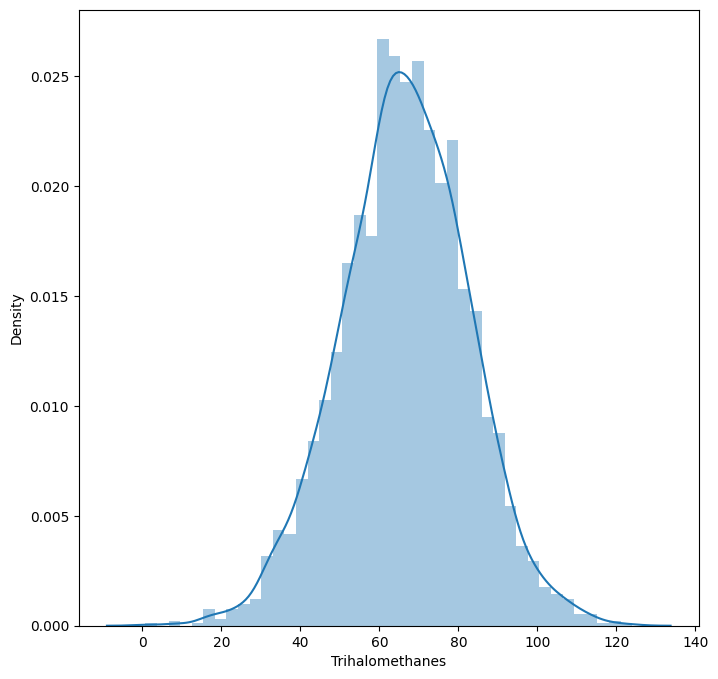

In [289]:
fig,ax = plt.subplots(figsize=(8,8))
sns.distplot(data.Trihalomethanes)

In [312]:
data['ph'].fillna(data['ph'].median(),inplace = True)
data['Sulfate'].fillna(data['Sulfate'].median(),inplace = True)
data['Trihalomethanes'].fillna(data['Trihalomethanes'].median(),inplace = True)

In [313]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [292]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [293]:
 correlation = data.corr()

<Axes: >

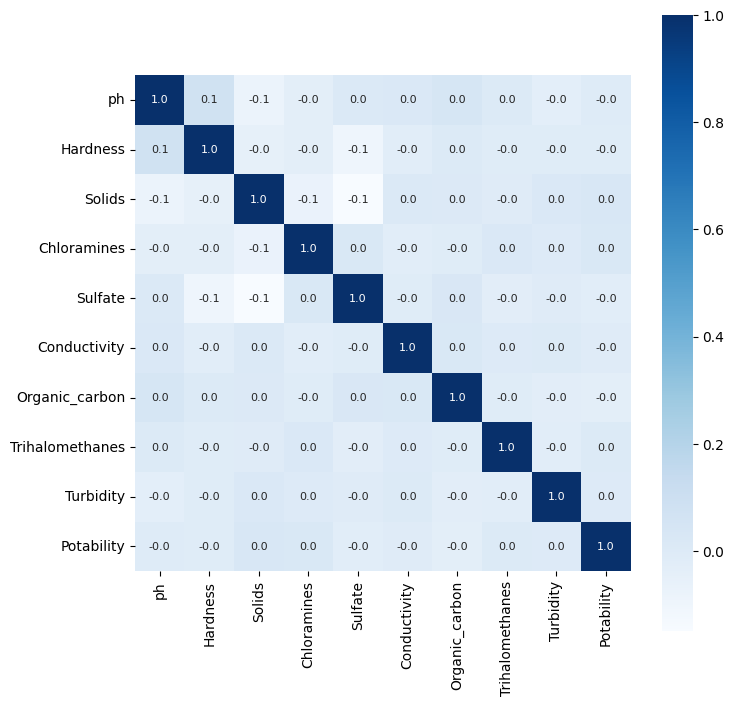

In [294]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar =True,square =True,fmt ='.1f',annot =True,annot_kws ={'size':8},cmap ='Blues')

In [314]:
X=data.drop(['Potability'],axis =1)
Y= data['Potability']

In [296]:
print(X)
print(Y)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.885359       15.180013       

In [321]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.2,random_state=100)

In [322]:
X_train.shape,X_test.shape

((2620, 9), (656, 9))

In [352]:
model = RandomForestClassifier(n_estimators=250)

In [353]:
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=250)

In [354]:
data_predic = model.predict(X_test)

In [355]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(Y_test, data_predic))
print(classification_report(Y_test, data_predic))
print(confusion_matrix(Y_test, data_predic))

0.6814024390243902
              precision    recall  f1-score   support

           0       0.68      0.91      0.78       400
           1       0.70      0.32      0.44       256

    accuracy                           0.68       656
   macro avg       0.69      0.62      0.61       656
weighted avg       0.69      0.68      0.65       656

[[364  36]
 [173  83]]


In [ ]:
# New, unseen data for prediction
new_data = pd.DataFrame({
    "ph": [7.2, 6.8, 8.1],
    "Hardness": [150, 200, 180],
    "Solids": [300, 400, 350],
    "Chloramines": [3.5, 2.8, 4.1],
    "Sulfate": [80, 120, 100],
    "Conductivity": [500, 600, 550],
    "Organic_carbon": [10, 12, 11],
    "Trihalomethanes": [60, 70, 65],
    "Turbidity": [5, 4, 6]
})

# Make predictions on the new data
predictions = model.predict(new_data)

# Print the predictions
print("Water Potability Predictions:")
print(predictions)

In [ ]:
import pandas as pd

# New, unseen data for prediction
new_data = pd.DataFrame({
    "ph": [7.2, 6.8, 8.1, 7.5, 6.5],
    "Hardness": [150, 200, 180, 170, 190],
    "Solids": [300, 400, 350, 320, 380],
    "Chloramines": [3.5, 2.8, 4.1, 3.9, 3.2],
    "Sulfate": [80, 120, 100, 110, 90],
    "Conductivity": [500, 600, 550, 570, 530],
    "Organic_carbon": [10, 12, 11, 11.5, 9.5],
    "Trihalomethanes": [60, 70, 65, 67, 62],
    "Turbidity": [5, 4, 6, 5.5, 4.5]
})

# Make predictions on the new data
predictions = model.predict(new_data)

# Print the predictions
print("Water Potability Predictions:")
print(predictions)